# Group Assignment 1

In [2]:
import pandas as pd
import requests
from bs4 import BeautifulSoup
import numpy as np 
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from collections import Counter
import re
from selenium import webdriver
from selenium.webdriver.common.by import By
import time
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.chrome.options import Options
import nltk
from nltk.corpus import stopwords
#nltk.download('stopwords')
import itertools
from sklearn.manifold import MDS

pd.set_option('display.max_columns', None)  # Show all columns
pd.set_option('display.expand_frame_repr', False)  # Prevent wrapping to multiple lines

## Scraper Development

In [3]:
def scrape_page(url):
    response = requests.get(url)
    if response.status_code == 200:
        soup = BeautifulSoup(response.text, "html.parser")

        messages = soup.find_all("div", class_ = "Message userContent")

        dates = soup.find_all("time")

        data = []

        for message, date in zip(messages, dates):
            message_text = message.get_text(strip = True)
            date_text = date.get("title")
            data.append({"Date": date_text, "Message": message_text})

        return data


def scrape_forum(base_url, total_pages):
    all_data = []

    for page_num in range(1, total_pages + 1):
        page_url = f"{base_url}/p{page_num}"
        print(f"Scraping page {page_num}: {page_url}")
        page_data = scrape_page(page_url)
        all_data.extend(page_data)
    return all_data

In [4]:
base_url = "https://forums.edmunds.com/discussion/2864/general/x/entry-level-luxury-performance-sedans"
total_pages = 300
forum_data = scrape_forum(base_url, total_pages)
messagedata = pd.DataFrame(forum_data)
messagedata.to_csv("messagedata.csv", index = False)
len(messagedata)

Scraping page 1: https://forums.edmunds.com/discussion/2864/general/x/entry-level-luxury-performance-sedans/p1
Scraping page 2: https://forums.edmunds.com/discussion/2864/general/x/entry-level-luxury-performance-sedans/p2
Scraping page 3: https://forums.edmunds.com/discussion/2864/general/x/entry-level-luxury-performance-sedans/p3
Scraping page 4: https://forums.edmunds.com/discussion/2864/general/x/entry-level-luxury-performance-sedans/p4
Scraping page 5: https://forums.edmunds.com/discussion/2864/general/x/entry-level-luxury-performance-sedans/p5
Scraping page 6: https://forums.edmunds.com/discussion/2864/general/x/entry-level-luxury-performance-sedans/p6
Scraping page 7: https://forums.edmunds.com/discussion/2864/general/x/entry-level-luxury-performance-sedans/p7
Scraping page 8: https://forums.edmunds.com/discussion/2864/general/x/entry-level-luxury-performance-sedans/p8
Scraping page 9: https://forums.edmunds.com/discussion/2864/general/x/entry-level-luxury-performance-sedans/p9
S

15001

## Task A

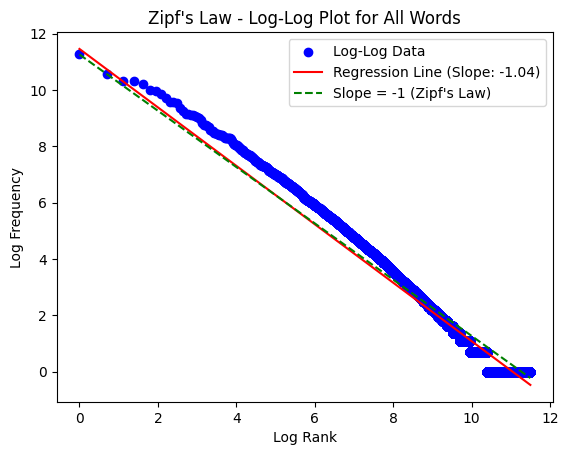

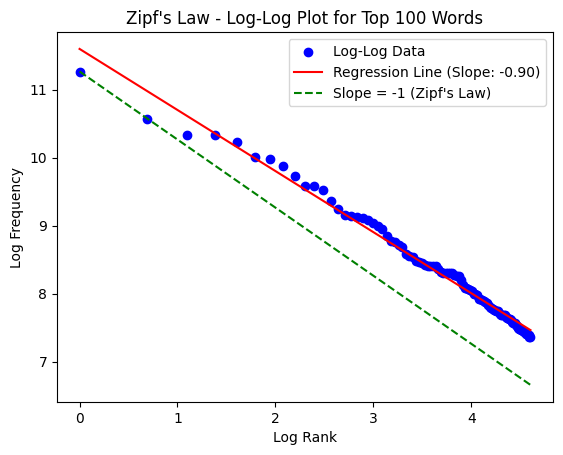

In [5]:
# Importing Data
messagedf = pd.read_csv("messagedata.csv")
messagedf['Message'] = messagedf['Message'].fillna('')

# Counting Number of Words and Sorting
words = ' '.join(messagedf['Message']).lower().split()
word_counts = Counter(words)
sorted_word_counts = sorted(word_counts.items(), key=lambda x: x[1], reverse=True)
sorted_word_counts_100 = sorted(word_counts.items(), key=lambda x: x[1], reverse=True)[:100]

# All Words

# Finding Ranks and Frequencies
ranks = np.arange(1, len(sorted_word_counts) + 1)
frequencies = np.array([count for word, count in sorted_word_counts])

# Log Transformations
log_ranks = np.log(ranks)
log_frequencies = np.log(frequencies)

# Econometric Regression
X = sm.add_constant(log_ranks)
model = sm.OLS(log_frequencies, X)
results = model.fit()

# Graphing Results 
zipf_line = log_frequencies[0] + (-1) * (log_ranks - log_ranks[0])

plt.scatter(log_ranks, log_frequencies, color='blue', label='Log-Log Data')
plt.plot(log_ranks, results.predict(X), color='red', label=f'Regression Line (Slope: {results.params[1]:.2f})')
plt.plot(log_ranks, zipf_line, color='green', linestyle='--', label='Slope = -1 (Zipf\'s Law)')
plt.xlabel('Log Rank')
plt.ylabel('Log Frequency')
plt.title('Zipf\'s Law - Log-Log Plot for All Words')
plt.legend()
plt.show()

# Top 100

# Finding Ranks and Frequencies
ranks_100 = np.arange(1, len(sorted_word_counts_100) + 1)
frequencies_100 = np.array([count for word, count in sorted_word_counts_100])

# Log Transformations
log_ranks_100 = np.log(ranks_100)
log_frequencies_100 = np.log(frequencies_100)

# Econometric Regression
X_100 = sm.add_constant(log_ranks_100)
model_100 = sm.OLS(log_frequencies_100, X_100)
results_100 = model_100.fit()

# Graphing Results 
zipf_line_100 = log_frequencies_100[0] + (-1) * (log_ranks_100 - log_ranks_100[0])

plt.scatter(log_ranks_100, log_frequencies_100, color='blue', label='Log-Log Data')
plt.plot(log_ranks_100, results_100.predict(X_100), color='red', label=f'Regression Line (Slope: {results_100.params[1]:.2f})')
plt.plot(log_ranks_100, zipf_line_100, color='green', linestyle='--', label='Slope = -1 (Zipf\'s Law)')
plt.xlabel('Log Rank')
plt.ylabel('Log Frequency')
plt.title('Zipf\'s Law - Log-Log Plot for Top 100 Words')
plt.legend()
plt.show()

Zipf's Law states that in a given dataset, the frequency of any word is inversely proportional to its rank. This means that the second most frequent word occurs approximately half as often as the most frequent word, the third most frequent word occurs a third as often, and so on. The plot econometrically supports Zipf's Law by showing that the relationship between the log of word rank and the log of word frequency is approximately linear with a slope close to -1. This suggests that the dataset follows a power-law distribution, which is consistent with Zipf's Law.

## Task B

In [6]:
mergedmakemodel = pd.read_csv('merged-1.csv')
mergedmakemodel = mergedmakemodel.drop(['Unnamed: 0'], axis = 1)
mergedmakemodel

,make,model
0,acura,cl
1,acura,ilx
2,acura,integra
3,acura,legend
4,acura,mdx
...,...,...
1725,volkswagen,volkwagen
1726,volkswagen,vw
1727,volkswagen,vws
1728,volkswagen,passats


In [7]:
stop_words = set(stopwords.words('english'))
model_to_brand = dict(zip(mergedmakemodel['model'].str.lower(), mergedmakemodel['make'].str.lower()))
brands_set = set(model_to_brand.values())

def replacements(message, model_to_brand, brands_set):
    words = re.findall(r'\w+', message.lower())
    replaced_words = [model_to_brand.get(word, word) for word in words]

    # Create a new message with replaced words
    new_message = ' '.join(replaced_words)

    # Filter the replaced words for the list
    filtered_brands = set([word for word in replaced_words if word not in stop_words and word in brands_set])

    return filtered_brands, new_message 

messages = messagedf['Message']
brand_counter = Counter()

for message in messages:
    brands, new_message = replacements(message, model_to_brand, brands_set)
    brand_counter.update(brands)

brands_to_remove = ['car', 'sedan', 'problem', 'seat', 'mini']

for brand in brands_to_remove:
    brand_counter.pop(brand, None)

top_10 = brand_counter.most_common(10)

print("Top 10 Brands by Frequency:")
for brand, count in top_10:
    print(f"{brand.capitalize()}: {count}")


Top 10 Brands by Frequency:
Infiniti: 11162
Lexus: 9380
Bmw: 5111
Acura: 3232
Polestar: 2365
Audi: 2234
Honda: 1691
Cadillac: 1319
Toyota: 1000
Nissan: 835


## Task C

In [8]:
top_10_brands = [brand for brand, count in top_10]

def find_co_occurrences(message, top_10_brands, distance=7):
    words = message.split()
    found_brands = []
    
    for i, word in enumerate(words):
        if word in top_10_brands:
            found_brands.append((word, i)) 
    
    co_occurrences = set()
    for (brand1, idx1), (brand2, idx2) in itertools.combinations(found_brands, 2):
        if abs(idx1 - idx2) <= distance:  # Check distance in terms of word indices
            co_occurrences.add(tuple(sorted((brand1, brand2))))  # Use sorted tuple for co-occurrence
    
    return co_occurrences

brand_counter = Counter()
co_occurrence_counter = Counter()

total_messages = len(messagedf)

# Loop through all messages to update counters
for message in messagedf['Message']:
    filtered_brands, replaced_message = replacements(message, model_to_brand, brands_set)
    # Update brand counter with the filtered brands
    brand_counter.update(filtered_brands)
    
    # Now find co-occurrences using the replaced message
    co_occurrences = find_co_occurrences(replaced_message, top_10_brands, distance=10)
    co_occurrence_counter.update(co_occurrences)

    
def calculate_lift(brand1, brand2, brand_counter, co_occurrence_counter, total_messages):
    P_A = brand_counter[brand1] / total_messages 
    P_B = brand_counter[brand2] / total_messages  
    
    # Combine counts for both (brand1, brand2) and (brand2, brand1)
    P_AB = (co_occurrence_counter[(brand1, brand2)] + co_occurrence_counter[(brand2, brand1)]) / total_messages #if (brand1, brand2) in co_occurrence_counter or (brand2, brand1) in co_occurrence_counter else 0
    
    if P_A * P_B == 0: 
        return 0
    return P_AB / (P_A * P_B)

lift_results = []
for (brand1, brand2) in itertools.combinations(top_10_brands, 2):
    lift = calculate_lift(brand1, brand2, brand_counter, co_occurrence_counter, total_messages)
    lift_results.append((brand1, brand2, lift))

lift_df = pd.DataFrame(lift_results, columns=['Brand1', 'Brand2', 'Lift'])
lift_df.sort_values(by='Lift', ascending=False, inplace=True)

lift_matrix = lift_df.pivot(index='Brand1', columns='Brand2', values='Lift')
lift_matrix = lift_matrix.combine_first(lift_matrix.T)
lift_matrix.fillna(0, inplace=True)

lift_df.to_csv('brand_lift_ratios.csv', index=False)
print(lift_matrix)

def replacements(message, model_to_brand, brands_set):
    words = re.findall(r'\w+', message.lower())
    replaced_words = [model_to_brand.get(word, word) for word in words]

    # Create a new message with replaced words
    new_message = ' '.join(replaced_words)

    # Filter the replaced words for the list
    filtered_brands = set([word for word in replaced_words if word not in stop_words and word in brands_set])
    return filtered_brands, new_message

             acura      audi       bmw  cadillac     honda  infiniti     lexus    nissan  polestar    toyota
acura     0.000000  0.806116  0.525801  0.668587  1.177504  0.868235  0.820409  0.528063  0.516147  0.385236
audi      0.806116  0.000000  0.773832  0.814540  0.357385  0.752579  0.657885  0.257336  1.016457  0.261880
bmw       0.525801  0.773832  0.000000  0.647534  0.300273  0.775175  0.732822  0.288232  0.536126  0.381555
cadillac  0.668587  0.814540  0.647534  0.000000  0.195043  0.781500  0.750522  0.136204  0.495315  0.272952
honda     1.177504  0.357385  0.300273  0.195043  0.000000  0.633422  0.540020  1.328006  0.390103  2.075833
infiniti  0.868235  0.752579  0.775175  0.781500  0.633422  0.000000  0.754208  0.783828  0.626791  0.532198
lexus     0.820409  0.657885  0.732822  0.750522  0.540020  0.754208  0.000000  0.589904  0.503782  0.626907
nissan    0.528063  0.257336  0.288232  0.136204  1.328006  0.783828  0.589904  0.000000  0.243082  1.868388
polestar  0.516147 

## Task D

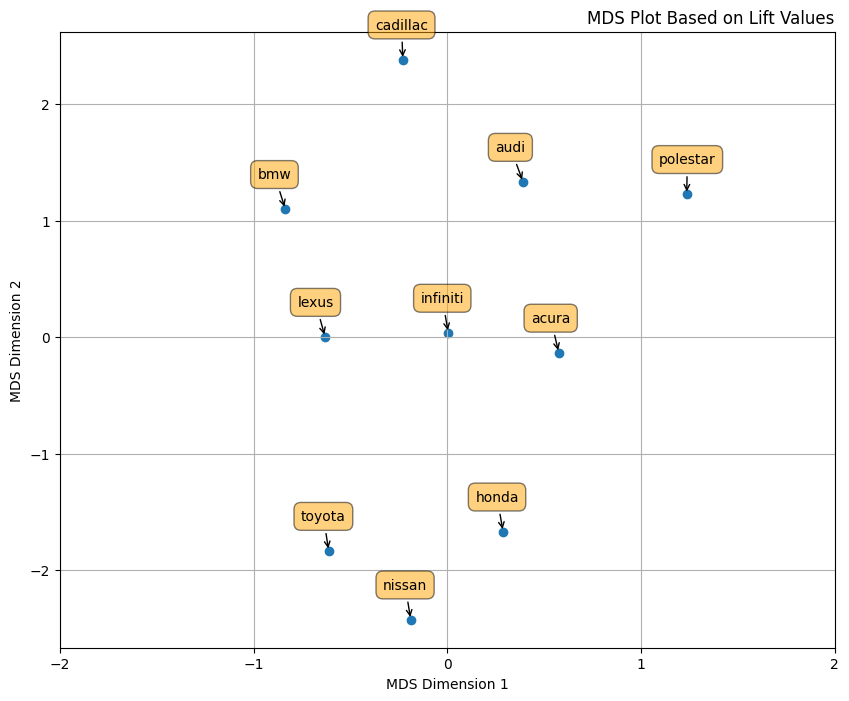

In [9]:

from sklearn import manifold
# Ensure `df_lift` is available and contains the lift values

# Invert the lift values to treat higher values as closer (distance)
# Use a small constant to avoid division by zero errors
dissimilarity_matrix = 1 / (lift_matrix + 1e-5)
np.fill_diagonal(dissimilarity_matrix.values, 0)  # Set diagonal to zero

# Multidimensional Scaling (MDS)
seed = np.random.RandomState(seed=65)
mds = manifold.MDS(n_components=2, max_iter=3000, eps=1e-9, 
                   random_state=seed, dissimilarity="precomputed")

try:
    results = mds.fit(dissimilarity_matrix)
    coords = results.embedding_
    
except ValueError as e:
    print(f"Error during MDS fitting: {e}")
    coords = np.zeros((len(lift_matrix), 2))  # Placeholder in case of error

# Plotting the MDS results
plt.figure(figsize=(10, 8))
plt.scatter(coords[:, 0], coords[:, 1], marker='o')

# Annotate each point with the corresponding brand name
for label, x, y in zip(lift_matrix.index, coords[:, 0], coords[:, 1]):
    plt.annotate(label, xy=(x, y), xytext=(-20, 20),
                 textcoords='offset points', ha='left', va='bottom',
                 bbox=dict(boxstyle='round,pad=0.5', fc='orange', alpha=0.5),
                 arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0'))

# Set x-axis limits from -2 to 2
plt.xlim(-2, 2)
# Set x-axis ticks at intervals of 1 unit
plt.xticks(np.arange(-2, 3, 1))  # Create ticks at -2, -1, 0, 1, 2
# Left-align the title
plt.title('MDS Plot Based on Lift Values', loc='right')
plt.xlabel('MDS Dimension 1')
plt.ylabel('MDS Dimension 2')
plt.grid(True)
plt.show()

## Task E

### Brand Perception
- Lexus, Infiniti, and Acura are positioned close to each other in the MDS plot, indicating that consumers often mention these brands together. This suggests that they are perceived similarly in terms of features, quality, or value proposition in the entry-level luxury segment. JD Power should consider these brands as direct competitors and further investigate the specific attributes that consumers associate with them.
- Audi and BMW are relatively close in the plot but distinctly separate from other brands, indicating a strong presence in the luxury segment with unique positioning. These brands are likely competing for the same high-performance and luxury-focused consumer base. Any marketing or product strategy for these brands should focus on their performance and luxury heritage.

### Brand Clustering
- Toyota, Nissan, and Honda are clustered away from the core luxury segment, indicating that while they may offer entry-level luxury models, they are primarily perceived as value-oriented or non-luxury brands. This could be due to their broader product range that includes more economy and family-oriented vehicles. JD Power could explore the potential for these brands to further penetrate the entry-level luxury market by enhancing luxury features or branding these specific models more distinctly.
- Polestar is positioned separately from the other brands, which may reflect its unique positioning in the electric vehicle luxury segment. This distinct positioning can be an advantage, but JD Power should monitor whether Polestar's brand perception aligns with entry-level luxury or if it is viewed more as a niche electric vehicle brand.

## Task F

In [10]:
word_counts = [(word, count) for word, count in sorted_word_counts if word.lower() not in stop_words]
word_counts

[('car', 8047),
 ('like', 5111),
 ('would', 4551),
 ('bmw', 4510),
 ('-', 4450),
 ('one', 4065),
 ('get', 4022),
 ('cars', 3869),
 ('think', 3253),
 ('new', 2946),
 ('tl', 2773),
 ('even', 2601),
 ('much', 2418),
 ("i'm", 2392),
 ('better', 2310),
 ('3', 2299),
 ('good', 2176),
 ('drive', 2166),
 ('people', 2118),
 ('really', 2043),
 ('know', 1962),
 ('want', 1848),
 ('driving', 1776),
 ('also', 1763),
 ('still', 1732),
 ('performance', 1694),
 ('see', 1659),
 ('make', 1647),
 ('could', 1632),
 ('luxury', 1576),
 ('g35', 1574),
 ("that's", 1539),
 ('acura', 1519),
 ('buy', 1511),
 ('price', 1489),
 ('lexus', 1487),
 ('back', 1474),
 ('say', 1469),
 ('going', 1444),
 ('many', 1409),
 ('go', 1393),
 ('time', 1377),
 ('well', 1372),
 ('way', 1336),
 ("i've", 1313),
 ('great', 1298),
 ('series', 1259),
 ('years', 1243),
 ('manual', 1243),
 ('got', 1236),
 ('never', 1217),
 ('less', 1209),
 ('take', 1207),
 ('best', 1188),
 ('engine', 1184),
 ('&', 1162),
 ('audi', 1159),
 ('may', 1150),
 (

In [11]:
import itertools
import pandas as pd
from collections import Counter
import re

top_10_brands = [brand for brand, count in top_10]
attributes = ['performance', 'luxury', 'price', 'interior', 'engine']

def find_co_occurrences(message, top_10_brands, attributes):
    words = message.split()
    found_brands = []
    found_attributes = []

    for word in words:
        if word in top_10_brands:
            found_brands.append(word)
        if word in attributes:
            found_attributes.append(word)
    
    co_occurrences = set()
    for brand in found_brands:
        for attribute in found_attributes:
            co_occurrences.add((brand, attribute))  # No distance check, just record co-occurrences
    
    return co_occurrences

brand_counter = Counter()
attribute_counter = Counter()  # Counter for attributes
co_occurrence_counter = Counter()

total_messages = len(messagedf)

# Loop through all messages to update counters
for message in messagedf['Message']:
    filtered_brands, replaced_message = replacements(message, model_to_brand, brands_set)
    
    # Update brand counter with the filtered brands
    brand_counter.update(filtered_brands)
    
    # Count attributes in the message
    for word in replaced_message.split():
        if word in attributes:
            attribute_counter[word] += 1
    
    # Find co-occurrences with attributes
    co_occurrences = find_co_occurrences(replaced_message, top_10_brands, attributes)
    co_occurrence_counter.update(co_occurrences)

def calculate_lift(brand, attribute, brand_counter, attribute_counter, co_occurrence_counter, total_messages):
    P_A = brand_counter[brand] / total_messages 
    P_B = attribute_counter[attribute] / total_messages if attribute in attribute_counter else 0
    P_AB = co_occurrence_counter[(brand, attribute)] / total_messages if (brand, attribute) in co_occurrence_counter else 0
    
    if P_A * P_B == 0: 
        return 0
    return P_AB / (P_A * P_B)

# Create a DataFrame for lifts
lift_results = []

for brand in top_10_brands:
    for attribute in attributes:
        lift = calculate_lift(brand, attribute, brand_counter, attribute_counter, co_occurrence_counter, total_messages)
        lift_results.append((brand, attribute, lift))

# Create a DataFrame with brands as rows and attributes as columns
lift_df = pd.DataFrame(lift_results, columns=['Brand', 'Attribute', 'Lift'])

# Pivot the DataFrame to have brands in rows and attributes in columns
final_lift_matrix = lift_df.pivot(index='Brand', columns='Attribute', values='Lift')

# Fill any NaN values with 0
final_lift_matrix.fillna(0, inplace=True)

# Save to CSV if needed
final_lift_matrix.to_csv('brand_attribute_lift_ratios.csv', index=True)

# Print the final lift matrix
print(final_lift_matrix)

Attribute    engine  interior    luxury  performance     price
Brand                                                         
acura      0.945520  1.149388  1.050638     1.068455  1.085862
audi       1.184746  1.345691  1.050859     1.099397  1.222916
bmw        1.090207  0.918934  0.899515     1.064660  1.196068
cadillac   1.095717  1.573190  1.186565     1.092033  1.233022
honda      1.142995  1.209149  1.264346     1.157572  1.206433
infiniti   0.819777  0.826130  0.734876     0.812317  0.846110
lexus      0.916113  0.897827  0.879701     0.932515  0.980237
nissan     1.428463  0.969785  1.029217     1.046807  0.965324
polestar   1.413628  1.074273  0.847889     1.087952  1.254709
toyota     1.036053  1.103312  1.669883     1.218793  1.198368


# Task G

There are several reccomendations that we would like to give to JD Power and Associates. These reccomendations range from identifying strenghts of competitors and identifying weakenesses. <br>
### Strenghts
- Audi and Cadillac: Both brands show strong lift values across multiple attributes, particularly in interior (Audi: 1.345, Cadillac: 1.573) and price (Audi: 1.222, Cadillac: 1.233). This suggests that they are perceived as leaders in providing high-quality interiors and justifying their pricing in the luxury segment. This perception aligns well with their positioning as premium brands.
- Honda and Toyota: Both brands have high lift values for luxury (Honda: 1.264, Toyota: 1.669) and performance (Honda: 1.157, Toyota: 1.218). Despite not traditionally being considered luxury brands, their entry-level luxury models seem to be well-regarded in these aspects. This could indicate growing acceptance of these brands in the luxury market.
- Polestar: Polestar has a notable lift value for engine (1.414) and price (1.254). This suggests that Polestar is perceived as offering strong engine performance and is considered relatively expensive, which is consistent with its electric vehicle and high-tech focus.

### Weakenesses
- Infiniti and Lexus: Both brands show lower lift values in luxury (Infiniti: 0.734, Lexus: 0.879) and performance (Infiniti: 0.812, Lexus: 0.932). For brands positioned as luxury, this could indicate that their current models are not perceived as competitive in these key attributes. They may need to invest in enhancing these aspects to improve their market position.
- BMW: The lift value for luxury (0.899) is relatively lower compared to competitors like Cadillac (1.186) and Audi (1.050). BMW might need to focus on reinforcing its luxury credentials to maintain its competitive edge.

# Task H

In [12]:
messagedf

,Date,Message
0,"March 23, 2002 12:04PM",Entry level performance luxury sedans are a ho...
1,"March 24, 2002 10:54PM",I personally think that with a few tweaks the ...
2,"March 25, 2002 12:06AM",I am debating a new purchase and these two are...
3,"March 25, 2002 10:02AM","Great handling, RWD, excellent engine and the ..."
4,"March 25, 2002 4:04PM",And no manual tranny. That may not matter to y...
...,...,...
14996,"January 17, 2013 9:27AM","I would believe the website, not the dealer on..."
14997,"January 17, 2013 9:56AM","Wow, the pricing on F30 is simply outrageous.I..."
14998,"January 17, 2013 10:40AM",dammit!I really thought you guys were talking ...
14999,"January 17, 2013 10:55AM","Holy cow! When I did the ""build your own"" for ..."


In [17]:
import pandas as pd
import nltk
from nltk import bigrams
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string

# Function to preprocess the text
def preprocess_text(text):
    # Convert to lowercase
    text = text.lower()
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    # Tokenize the text
    tokens = word_tokenize(text)
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]
    return tokens

# Function to extract and count bigrams
def find_bigrams_with_frequency(messages):
    bigram_counter = nltk.FreqDist()  # Initialize a frequency distribution for bigrams
    for message in messages:
        tokens = preprocess_text(message)
        # Find bigrams in the tokenized message
        message_bigrams = list(bigrams(tokens))
        # Update the frequency distribution with the bigrams
        bigram_counter.update(message_bigrams)
    return bigram_counter


In [20]:
messages = messagedf['Message']

# Find all bigrams and their frequencies in the messages
bigram_freq = find_bigrams_with_frequency(messages)

# Convert to a DataFrame for better visualization
bigrams_df = pd.DataFrame(bigram_freq.items(), columns=['Bigram', 'Frequency'])

# Sort by frequency in descending order
bigrams_df = bigrams_df.sort_values(by='Frequency', ascending=False)

# Display the top bigrams
print(len(bigrams_df))
bigrams_csv = bigrams_df.to_csv('bigrams.csv', index=False)

471074
